In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.patches as mpatches
from sklearn.metrics import r2_score
data = pd.read_excel('AirQualityUCI.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [2]:
#Cleaning up header names so they are more readable
new_col_names = ['Date', 'Time', 'CO (mg/m^3), True HA', 'Tin oxide, HA', 'NMHC, True HA', 'Benzene (micromg/m^3), True HA', 'Titania, HA', 'NOx (ppb), True HA', 'Tungsten oxide, HA, nom NOx targeted','NO2 (micromg/m^3), True HA' ,'Tungsten oxide, HA, nom NO2 targeted','Indium oxide, HA', 'Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity']
data.columns = new_col_names#Checking data for new col names
data.head()

,Date,Time,"CO (mg/m^3), True HA","Tin oxide, HA","NMHC, True HA","Benzene (micromg/m^3), True HA","Titania, HA","NOx (ppb), True HA","Tungsten oxide, HA, nom NOx targeted","NO2 (micromg/m^3), True HA","Tungsten oxide, HA, nom NO2 targeted","Indium oxide, HA","Temp, Celsius","Relative Humidity, %",Absolute Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
#In the dataset notes, missing data has been replaced with -200
#Let's remove those data points
for col in new_col_names:
    data = data[data[col] != -200]

In [4]:
interest_cols = ['Tin oxide, HA', 'NOx (ppb), True HA','CO (mg/m^3), True HA',
                 'NO2 (micromg/m^3), True HA', 'Temp, Celsius',
                 'Relative Humidity, %', 'Absolute Humidity']

interest_data = data[interest_cols]


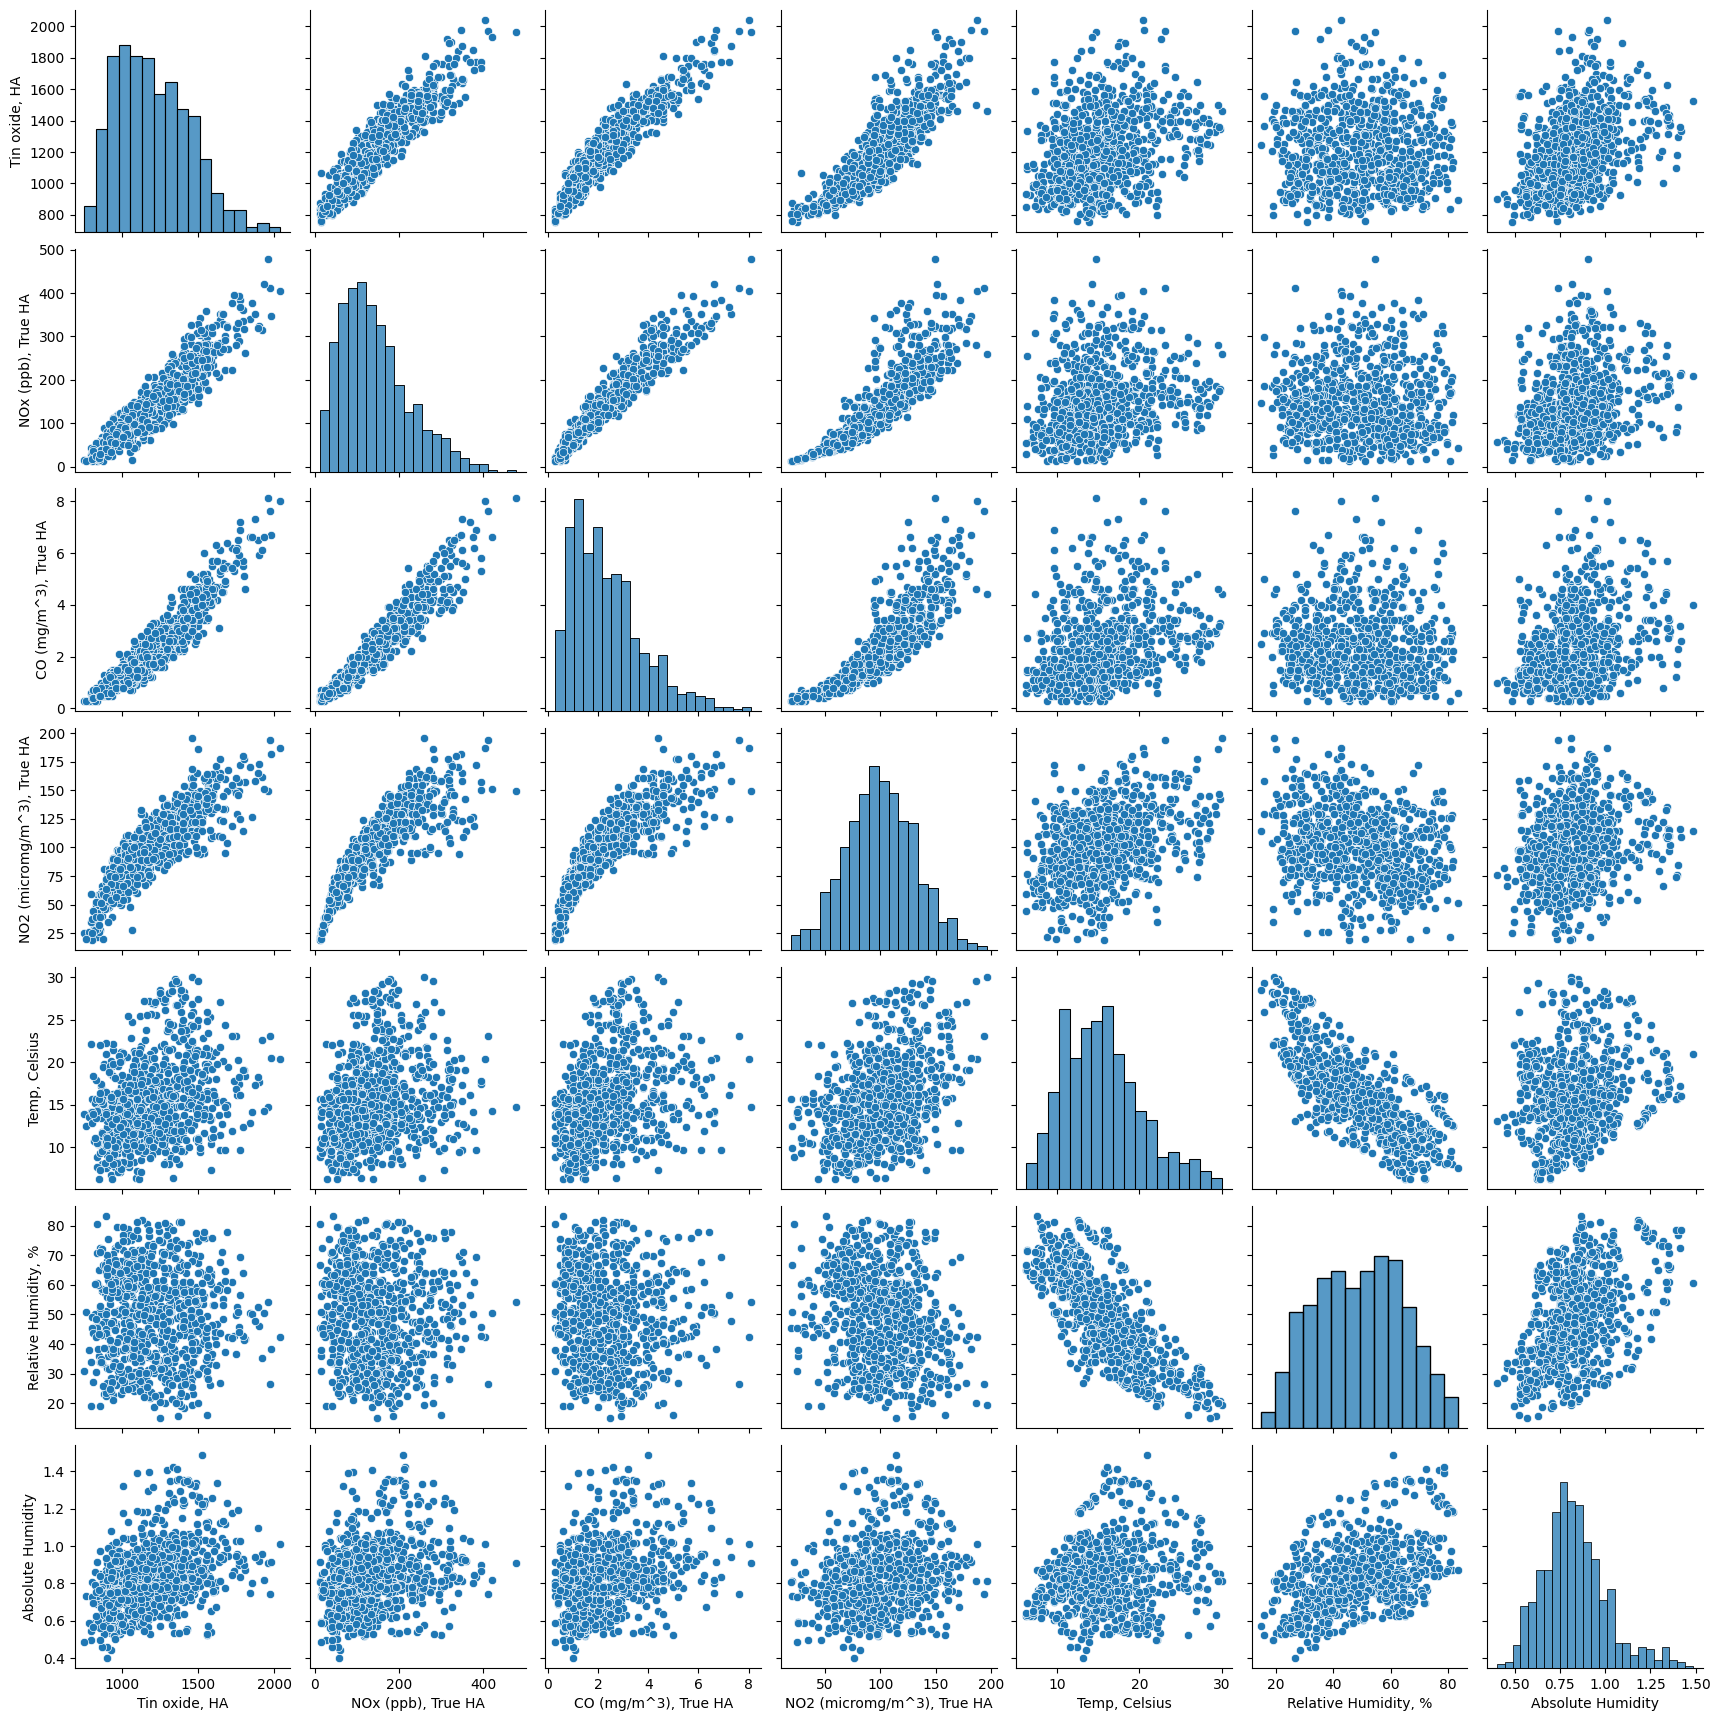

In [9]:
sns.pairplot(interest_data)

In [5]:
reversed_names = list(reversed(interest_cols))#Let's run through and see which variables are the most related using Spearman's Correlation
related_rho = []
related_pval = []
rho_vals = []
p_vals = []#Finding related features
for col in interest_cols:
    for col2 in reversed_names:
        rho, pval = spearmanr(interest_data[col], interest_data[col2])
        if abs(rho) > .8:
            rho_vals.append(rho)
            related_rho.append([col, col2])
        if pval < 0.05:
            p_vals.append(pval)
            related_pval.append([col, col2])#Taking a look
print(len(rho_vals), len(p_vals))

19 47


In [6]:
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(interest_data)
df_normalized = pd.DataFrame(np_scaled, columns = interest_cols)
df_normalized.head()

,"Tin oxide, HA","NOx (ppb), True HA","CO (mg/m^3), True HA","NO2 (micromg/m^3), True HA","Temp, Celsius","Relative Humidity, %",Absolute Humidity
0,0.471936,0.330472,0.294872,0.531073,0.308746,0.497256,0.328221
1,0.419305,0.195279,0.217949,0.412429,0.296101,0.480059,0.298425
2,0.504564,0.255365,0.243590,0.536723,0.237092,0.571899,0.321281
3,0.483977,0.343348,0.243590,0.581921,0.199157,0.660081,0.354962
4,0.403768,0.255365,0.166667,0.548023,0.205479,0.653860,0.356884


In [7]:
x = df_normalized[['Tin oxide, HA', 'NOx (ppb), True HA',
                   'CO (mg/m^3), True HA', 'NO2 (micromg/m^3), True HA',
                   'Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity']]

y = df_normalized[['Tin oxide, HA', 'NOx (ppb), True HA',
                   'CO (mg/m^3), True HA', 'NO2 (micromg/m^3), True HA']]

# Dropping rows so labels are future data
len_x = len(x)
x = x.drop(x.index[len_x-1])
y = y.drop(y.index[0])

In [8]:
#Splitting data into training and testing sets
train_data, test_data, train_label, test_label = train_test_split(x,y)

In [9]:
model = Sequential()
model.add(Dense(7, input_dim=7, activation='sigmoid'))
model.add(Dense(49, activation='relu'))
model.add(Dense(4, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mse'])#Storing loss data and fitting model
history = model.fit(train_data, train_label, epochs=2000)

Epoch 1/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1356 - mse: 0.1356
Epoch 2/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0285 - mse: 0.0285  
Epoch 3/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - mse: 0.0273 
Epoch 4/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0270 - mse: 0.0270 
Epoch 5/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mse: 0.0245
Epoch 6/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0242 - mse: 0.0242 
Epoch 7/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - mse: 0.0212 
Epoch 8/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 - mse: 0.0211 
Epoch 9/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mse: 0.0191 
Epoch 10/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0206 - mse: 0.0206 
Epoch 11/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 - mse: 0.0158 
Epoch 12/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - mse: 0.0169 
Epoch 13/2000


KeyboardInterrupt: 

In [12]:
loss_vals = history.history['loss']
epochs = range(1, len(loss_vals)+1)
plt.plot(epochs, loss_vals, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.legend()
plt.title('MSE vs Epochs')
plt.show()

NameError: name 'history' is not defined

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


ValueError: x has 7 columns but y has 4 columns

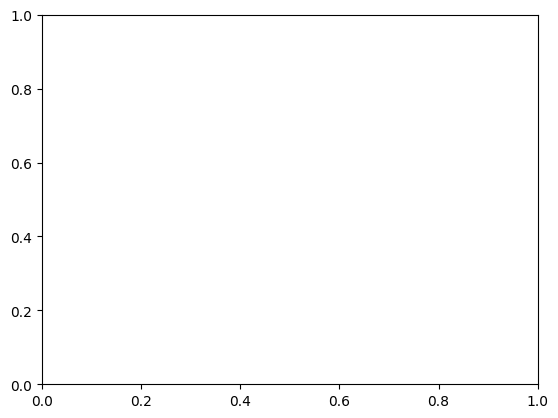

In [13]:
predictions = model.predict(test_data)#Plotting predictions with actual labels
actual = mpatches.Patch(color='red', label='Actual Label')
predicted_label = mpatches.Patch(color='blue', label='Predicted Label')#Plotting
plt.plot(test_data, test_label, 'o', color='red', alpha=.1)
plt.plot(test_data, predictions, 'o', color='blue', alpha=.1)
plt.title('Actual Label vs Predicted Label')
plt.xlabel('Test Data')
plt.ylabel('Label')
plt.legend(handles=[actual, predicted_label])

In [14]:
r2 = r2_score(test_label, predictions)